# Lead Scoring Case Study

## Problem Statement

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Step 1: Importing the data

In [3851]:
#Importing the useful libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3852]:
lead_data = pd.read_csv('Leads.csv')
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the DataFrame

In [3853]:
# Analysing the data frame
lead_data.shape

(9240, 37)

In [3854]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [3855]:
#Checking missing values

percent = ((lead_data.isnull().sum()/lead_data.isnull().count())*100).sort_values(ascending=False)

In [3856]:
percent[percent>0]

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [3857]:
# Treating missing values
# Replacing "Select" variable with null value

lead_data.replace("Select",np.nan,inplace = True)

In [3858]:
percent = ((lead_data.isnull().sum()/lead_data.isnull().count())*100).sort_values(ascending=False)
percent[percent>0]

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

### Step 3: Data Cleaning

In [3859]:
# Dropping the columns with High Percentage of missing values

col=['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Activity Index','Asymmetrique Profile Index']
lead_data.drop(col, axis=1, inplace = True)

In [3860]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [3861]:
#checking missing values by rows

for i in range(0,30):
    print("row ",i,lead_data.loc[[i]].isna().sum().sum())


row  0 3
row  1 2
row  2 0
row  3 0
row  4 1
row  5 6
row  6 0
row  7 6
row  8 3
row  9 3
row  10 0
row  11 0
row  12 1
row  13 0
row  14 2
row  15 2
row  16 6
row  17 2
row  18 1
row  19 2
row  20 0
row  21 2
row  22 0
row  23 0
row  24 0
row  25 0
row  26 0
row  27 0
row  28 1
row  29 0


In [3862]:
#analysing the categorical columns

#combining the categories having less values into a single category

lead_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
NC_EDM                  1
youtubechannel          1
WeLearn                 1
testone                 1
Pay per Click Ads       1
blog                    1
welearnblog_Home        1
Name: Lead Source, dtype: int64

In [3863]:
lead_data['Lead Source']=np.where(lead_data['Lead Source'].isin(['bing','google','Click2call','Live Chat','Social Media','Press_Release','NC_EDM','youtubechannel','WeLearn','testone','Pay per Click Ads','blog','welearnblog_Home']),"Others",lead_data['Lead Source'])

In [3864]:
lead_data['Lead Source'].value_counts()
lead_data['Lead Source'].fillna(lead_data['Lead Source'].mode()[0],inplace=True)

In [3865]:
lead_data['Lead Source'].isnull().sum()

0

In [3866]:
#has to remove because of the heavy weight of one category variable

lead_data['Do Not Email'].value_counts() 

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [3867]:
#has to remove because of the heavy weight of one category variable

lead_data['Do Not Call'].value_counts() 

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [3868]:
# imputing missing values in the column TotalVisits and converting them into groups

lead_data['TotalVisits'].fillna(lead_data['TotalVisits'].median(),inplace=True)

In [3869]:
#converting the datatype into int

lead_data['TotalVisits']=lead_data['TotalVisits'].astype(int)

<AxesSubplot:xlabel='TotalVisits'>

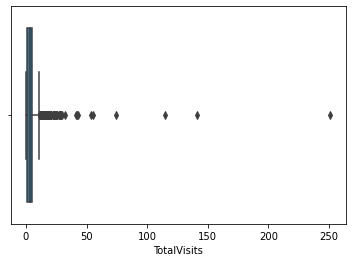

In [3870]:
sns.boxplot(lead_data['TotalVisits'])

In [3871]:
# removing the outliers

cols = ['TotalVisits'] # one or more

Q1 = lead_data[cols].quantile(0.25)
Q3 = lead_data[cols].quantile(0.99)
IQR = Q3 - Q1

lead_data=lead_data[~((lead_data[cols] < (Q1 - 1.5 * IQR)) |(lead_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:xlabel='TotalVisits'>

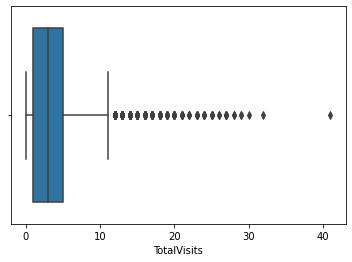

In [3872]:
sns.boxplot(lead_data['TotalVisits'])

<AxesSubplot:xlabel='TotalVisits', ylabel='Density'>

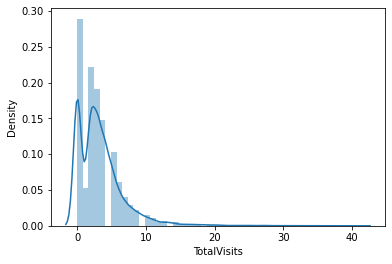

In [3873]:
sns.distplot(lead_data['TotalVisits'])

In [3874]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9232 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9232 non-null   object 
 1   Lead Number                                    9232 non-null   int64  
 2   Lead Origin                                    9232 non-null   object 
 3   Lead Source                                    9232 non-null   object 
 4   Do Not Email                                   9232 non-null   object 
 5   Do Not Call                                    9232 non-null   object 
 6   Converted                                      9232 non-null   int64  
 7   TotalVisits                                    9232 non-null   int64  
 8   Total Time Spent on Website                    9232 non-null   int64  
 9   Page Views Per Visit                           9095 

In [3875]:
lead_data["Total Time Spent on Website"].value_counts()

0       2193
60        19
74        18
75        18
127       18
        ... 
580        1
620        1
628        1
684        1
1975       1
Name: Total Time Spent on Website, Length: 1731, dtype: int64

<AxesSubplot:xlabel='Total Time Spent on Website', ylabel='Density'>

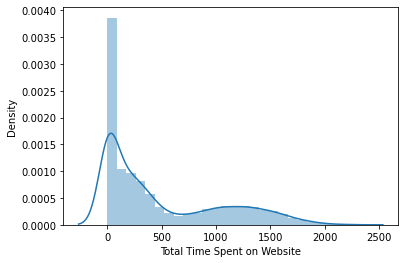

In [3876]:
sns.distplot(lead_data["Total Time Spent on Website"])

<AxesSubplot:xlabel='Total Time Spent on Website'>

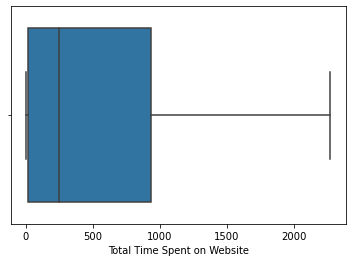

In [3877]:
sns.boxplot(lead_data["Total Time Spent on Website"])

Although column ""Total Time Spent on Website" has no outliers but it is highley skewed, so we will drop it.

In [3878]:
#dropping the columns which is not necessary and having only one wieght category

lead_data.drop(['Prospect ID','Do Not Email','Do Not Call','Total Time Spent on Website'],axis=1,inplace=True)
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9232 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9232 non-null   int64  
 1   Lead Origin                                    9232 non-null   object 
 2   Lead Source                                    9232 non-null   object 
 3   Converted                                      9232 non-null   int64  
 4   TotalVisits                                    9232 non-null   int64  
 5   Page Views Per Visit                           9095 non-null   float64
 6   Last Activity                                  9129 non-null   object 
 7   Country                                        6771 non-null   object 
 8   Specialization                                 5855 non-null   object 
 9   What is your current occupation                6544 

In [3879]:
lead_data['Page Views Per Visit'].fillna(lead_data['Page Views Per Visit'].mode()[0],inplace=True)

In [3880]:
lead_data.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Converted                                           0
TotalVisits                                         0
Page Views Per Visit                                0
Last Activity                                     103
Country                                          2461
Specialization                                   3377
What is your current occupation                  2688
What matters most to you in choosing a course    2706
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About O

<AxesSubplot:xlabel='Page Views Per Visit', ylabel='Density'>

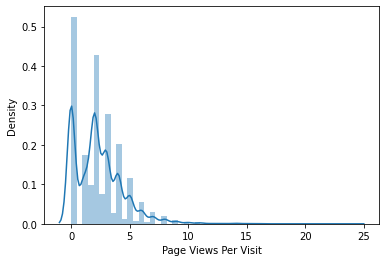

In [3881]:
#Checking skewness nature of 'Page Views Per Visit'

sns.distplot(lead_data['Page Views Per Visit'])

<AxesSubplot:xlabel='Page Views Per Visit'>

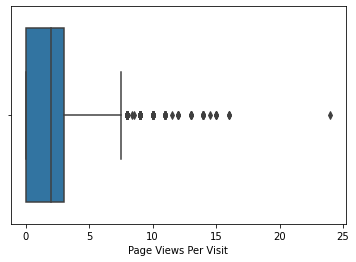

In [3882]:
sns.boxplot(lead_data['Page Views Per Visit'])

In [3883]:
#Treating the outlier in 'Page Views Per Visit'

lead_data['Page Views Per Visit']=lead_data['Page Views Per Visit'][~(lead_data['Page Views Per Visit']>20.0)]

<AxesSubplot:xlabel='Page Views Per Visit'>

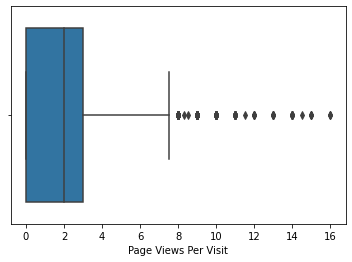

In [3884]:
sns.boxplot(lead_data['Page Views Per Visit'])

In [3885]:
lead_data['Page Views Per Visit'].dtype

dtype('float64')

In [3886]:
# dropping the colums which have taken from sales representative

lead_data.drop(['Last Activity','Last Notable Activity','Tags'],axis=1,inplace=True)

In [3887]:
100*lead_data.isnull().sum()/lead_data.shape[0]

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.000000
Converted                                         0.000000
TotalVisits                                       0.000000
Page Views Per Visit                              0.010832
Country                                          26.657279
Specialization                                   36.579289
What is your current occupation                  29.116118
What matters most to you in choosing a course    29.311092
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.000000
Digital Advertisement                             0.000000
Through Recommendations                           0.0000

In [3888]:
lead_data['Country'].fillna(lead_data['Country'].mode()[0],inplace=True)

In [3889]:
lead_data.Country.value_counts()

India                   8945
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Canada                     4
Germany                    4
Sweden                     3
China                      2
Italy                      2
Philippines                2
Ghana                      2
Netherlands                2
Bangladesh                 2
Uganda                     2
Belgium                    2
Asia/Pacific Region        2
Russia                     1
Indonesia                  1
Denmark                    1
Vietnam                    1
Liberia                    1
Malaysia                   1
Tanzania      

In [3890]:
lead_data['Country'].unique()

array(['India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [3891]:
#Changing the category to other which has less representation

lead_data['Country']=np.where(lead_data['Country'].isin(['Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia']),"Outside India",lead_data['Country'])

In [3892]:
lead_data.Country.value_counts()

India            8945
Outside India     287
Name: Country, dtype: int64

In [3893]:
lead_data['Specialization'].fillna(lead_data['Specialization'].mode()[0],inplace=True)

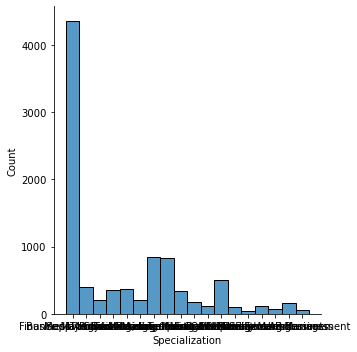

In [3894]:
sns.displot(lead_data['Specialization'])

In [3895]:
lead_data['Specialization'].value_counts()/lead_data.shape[0]

Finance Management                   0.471512
Human Resource Management            0.091746
Marketing Management                 0.090663
Operations Management                0.054484
Business Administration              0.043653
IT Projects Management               0.039536
Supply Chain Management              0.037695
Banking, Investment And Insurance    0.036612
Media and Advertising                0.021989
Travel and Tourism                   0.021989
International Business               0.019281
Healthcare Management                0.017223
Hospitality Management               0.012348
E-COMMERCE                           0.012132
Retail Management                    0.010832
Rural and Agribusiness               0.007799
E-Business                           0.006174
Services Excellence                  0.004333
Name: Specialization, dtype: float64

In [3896]:
lead_data['Specialization'].unique()

array(['Finance Management', 'Business Administration',
       'Media and Advertising', 'Supply Chain Management',
       'IT Projects Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [3897]:
#Changing the category to other which has less representation

lead_data['Specialization']=np.where(lead_data['Specialization'].isin(['Business Administration',
       'Media and Advertising', 'Supply Chain Management',
       'IT Projects Management', 'Travel and Tourism',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business']),"Others",lead_data['Specialization'])

In [3898]:
lead_data['Specialization'].value_counts()

Finance Management           4353
Others                       3195
Human Resource Management     847
Marketing Management          837
Name: Specialization, dtype: int64

In [3899]:
lead_data['What is your current occupation'].fillna(lead_data['What is your current occupation'].mode()[0],inplace=True)

In [3900]:
lead_data['What is your current occupation'].value_counts()

Unemployed              8282
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [3901]:
lead_data['What is your current occupation'].unique()

array(['Unemployed', 'Student', 'Working Professional', 'Businessman',
       'Other', 'Housewife'], dtype=object)

In [3902]:
#Changing the category to other which has less representation

lead_data['What is your current occupation']=np.where(lead_data['What is your current occupation'].isin(['Student', 'Working Professional', 'Businessman',
       'Other', 'Housewife']),"Others",lead_data['What is your current occupation'])

In [3903]:
lead_data['What is your current occupation'].value_counts()

Unemployed    8282
Others         950
Name: What is your current occupation, dtype: int64

In [3904]:
lead_data['What matters most to you in choosing a course'].fillna(lead_data['What matters most to you in choosing a course'].mode()[0],inplace=True)

In [3905]:
lead_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9229
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [3906]:
# dropping the column 'What matters most to you in choosing a course' because of very high weight of one category

lead_data.drop(['What matters most to you in choosing a course'],axis=1,inplace=True)

In [3907]:
lead_data['Search'].value_counts()

No     9218
Yes      14
Name: Search, dtype: int64

In [3908]:
# dropping the column 'What matters most to you in choosing a course' because of very high weight of one category

lead_data.drop(['Search'],axis=1,inplace=True)

In [3909]:
lead_data['Magazine'].value_counts()

No    9232
Name: Magazine, dtype: int64

In [3910]:
lead_data['Newspaper Article'].value_counts()

No     9230
Yes       2
Name: Newspaper Article, dtype: int64

In [3911]:
lead_data['X Education Forums'].value_counts()

No     9231
Yes       1
Name: X Education Forums, dtype: int64

In [3912]:
lead_data['Newspaper'].value_counts()

No     9231
Yes       1
Name: Newspaper, dtype: int64

In [3913]:
lead_data['Digital Advertisement'].value_counts()

No     9228
Yes       4
Name: Digital Advertisement, dtype: int64

In [3914]:
lead_data['Through Recommendations'].value_counts()

No     9225
Yes       7
Name: Through Recommendations, dtype: int64

In [3915]:
lead_data['Receive More Updates About Our Courses'].value_counts()

No    9232
Name: Receive More Updates About Our Courses, dtype: int64

In [3916]:
lead_data['Update me on Supply Chain Content'].value_counts()

No    9232
Name: Update me on Supply Chain Content, dtype: int64

In [3917]:
lead_data['Get updates on DM Content'].value_counts()

No    9232
Name: Get updates on DM Content, dtype: int64

In [3918]:
lead_data['I agree to pay the amount through cheque'].value_counts()

No    9232
Name: I agree to pay the amount through cheque, dtype: int64

In [3919]:
lead_data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Page Views Per Visit', 'Country', 'Specialization',
       'What is your current occupation', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [3920]:
# dropping all the above columns which have very high percentage of only one category

lead_data.drop(['Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [3921]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9232 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9232 non-null   int64  
 1   Lead Origin                             9232 non-null   object 
 2   Lead Source                             9232 non-null   object 
 3   Converted                               9232 non-null   int64  
 4   TotalVisits                             9232 non-null   int64  
 5   Page Views Per Visit                    9231 non-null   float64
 6   Country                                 9232 non-null   object 
 7   Specialization                          9232 non-null   object 
 8   What is your current occupation         9232 non-null   object 
 9   City                                    5563 non-null   object 
 10  A free copy of Mastering The Interview  9232 non-null   obje

In [3922]:
lead_data.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Converted                                    0
TotalVisits                                  0
Page Views Per Visit                         1
Country                                      0
Specialization                               0
What is your current occupation              0
City                                      3669
A free copy of Mastering The Interview       0
dtype: int64

In [3923]:
lead_data['A free copy of Mastering The Interview'].value_counts()

No     6347
Yes    2885
Name: A free copy of Mastering The Interview, dtype: int64

In [3924]:
# Treating the missing value in 'Page Views Per Visit'

lead_data['Page Views Per Visit'].fillna(lead_data['Page Views Per Visit'].mode()[0],inplace=True)

In [3925]:
lead_data.City.fillna(lead_data.City.mode()[0],inplace=True)

In [3926]:
100*lead_data.City.value_counts()/lead_data.shape[0]

Mumbai                         74.599220
Thane & Outskirts               8.113085
Other Cities                    7.419844
Other Cities of Maharashtra     4.950173
Other Metro Cities              4.116118
Tier II Cities                  0.801560
Name: City, dtype: float64

In [3927]:
lead_data.City.unique()

array(['Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [3928]:
lead_data.City=np.where(lead_data['City'].isin(['Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities']),"Others",lead_data['City'])

In [3929]:
lead_data.City.value_counts()

Mumbai    6887
Others    2345
Name: City, dtype: int64

In [3930]:
# checking the percentage of rows retained in data cleaning process.

df = pd.read_csv('Leads.csv')

In [3931]:
100*lead_data.shape[0]/df.shape[0]

99.91341991341992

### Step 4: Data Preparation

In [3932]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9232 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9232 non-null   int64  
 1   Lead Origin                             9232 non-null   object 
 2   Lead Source                             9232 non-null   object 
 3   Converted                               9232 non-null   int64  
 4   TotalVisits                             9232 non-null   int64  
 5   Page Views Per Visit                    9232 non-null   float64
 6   Country                                 9232 non-null   object 
 7   Specialization                          9232 non-null   object 
 8   What is your current occupation         9232 non-null   object 
 9   City                                    9232 non-null   object 
 10  A free copy of Mastering The Interview  9232 non-null   obje

In [3933]:
100*lead_data['Lead Origin'].value_counts()/lead_data.shape[0]

Landing Page Submission    52.837955
API                        38.778163
Lead Add Form               7.777296
Lead Import                 0.595754
Quick Add Form              0.010832
Name: Lead Origin, dtype: float64

In [3934]:
lead_data['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [3935]:
lead_data['Lead Origin']=np.where(lead_data['Lead Origin'].isin(['Lead Import',
       'Quick Add Form']),"Others",lead_data['Lead Origin'])

In [3936]:
lead_data.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Page Views Per Visit', 'Country', 'Specialization',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [3937]:


lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0,0.0,India,Finance Management,Unemployed,Mumbai,No
1,660728,API,Organic Search,0,5,2.5,India,Finance Management,Unemployed,Mumbai,No
2,660727,Landing Page Submission,Direct Traffic,1,2,2.0,India,Others,Others,Mumbai,Yes
3,660719,Landing Page Submission,Direct Traffic,0,1,1.0,India,Others,Unemployed,Mumbai,No
4,660681,Landing Page Submission,Google,1,2,1.0,India,Finance Management,Unemployed,Mumbai,No


In [3938]:
lead_data['Specialization'].value_counts()

Finance Management           4353
Others                       3195
Human Resource Management     847
Marketing Management          837
Name: Specialization, dtype: int64

In [3939]:
# Converting some binary vaiables to 0/1

lead_data['Country']=lead_data['Country'].map({'India' : 1,"Outside India":0})
lead_data["What is your current occupation"]=lead_data["What is your current occupation"].map({'Unemployed' : 1,'Others':0})
lead_data['City']=lead_data['City'].map({'Mumbai' : 1,'Others':0})
lead_data["A free copy of Mastering The Interview"]=lead_data["A free copy of Mastering The Interview"].map({'Yes' : 1,'No':0})

In [3940]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source','Specialization']],drop_first=True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy], axis=1)
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Country,Specialization,What is your current occupation,City,...,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others
0,660737,API,Olark Chat,0,0,0.0,1,Finance Management,1,1,...,0,1,0,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,5,2.5,1,Finance Management,1,1,...,0,0,1,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2,2.0,1,Others,0,1,...,0,0,0,0,0,0,0,0,0,1
3,660719,Landing Page Submission,Direct Traffic,0,1,1.0,1,Others,1,1,...,0,0,0,0,0,0,0,0,0,1
4,660681,Landing Page Submission,Google,1,2,1.0,1,Finance Management,1,1,...,1,0,0,0,0,0,0,0,0,0


In [3941]:
# dropping the categorical which converted to dummies

lead_data.drop(['Lead Origin', 'Lead Source','Specialization'],axis=1,inplace=True)
lead_data.head()

,Lead Number,Converted,TotalVisits,Page Views Per Visit,Country,What is your current occupation,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others
0,660737,0,0,0.0,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,660728,0,5,2.5,1,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,660727,1,2,2.0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,660719,0,1,1.0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,660681,1,2,1.0,1,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [3942]:
#inspecting the data frame

lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9232 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9232 non-null   int64  
 1   Converted                                 9232 non-null   int64  
 2   TotalVisits                               9232 non-null   int64  
 3   Page Views Per Visit                      9232 non-null   float64
 4   Country                                   9232 non-null   int64  
 5   What is your current occupation           9232 non-null   int64  
 6   City                                      9232 non-null   int64  
 7   A free copy of Mastering The Interview    9232 non-null   int64  
 8   Lead Origin_Landing Page Submission       9232 non-null   uint8  
 9   Lead Origin_Lead Add Form                 9232 non-null   uint8  
 10  Lead Origin_Others                  

In [3943]:
# checking null value if any

lead_data.isnull().sum()

Lead Number                                 0
Converted                                   0
TotalVisits                                 0
Page Views Per Visit                        0
Country                                     0
What is your current occupation             0
City                                        0
A free copy of Mastering The Interview      0
Lead Origin_Landing Page Submission         0
Lead Origin_Lead Add Form                   0
Lead Origin_Others                          0
Lead Source_Facebook                        0
Lead Source_Google                          0
Lead Source_Olark Chat                      0
Lead Source_Organic Search                  0
Lead Source_Others                          0
Lead Source_Reference                       0
Lead Source_Referral Sites                  0
Lead Source_Welingak Website                0
Specialization_Human Resource Management    0
Specialization_Marketing Management         0
Specialization_Others             

### Step 4: Test-Train Split 

In [3944]:
from sklearn.model_selection import train_test_split

In [3945]:
#Putting feature variable to x
lead_data.set_index("Lead Number",inplace=True)
X = lead_data.drop(['Converted'],axis=1)
X.head()

,TotalVisits,Page Views Per Visit,Country,What is your current occupation,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others
Lead Number,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
660728,5,2.5,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
660727,2,2.0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
660719,1,1.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
660681,2,1.0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [3946]:
#Putting response variable to y

y=lead_data['Converted']
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [3947]:
#Splitting the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [3948]:
from sklearn.preprocessing import StandardScaler

In [3949]:
scaler = StandardScaler()

X_train[['TotalVisits','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit']])

X_train.head()

,TotalVisits,Page Views Per Visit,Country,What is your current occupation,City,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others
Lead Number,,,,,,,,,,,,,,,,,,,,
649186,0.775162,1.772798,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
599500,0.189782,-0.155774,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1
618449,-0.102908,-0.396846,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
629464,0.189782,0.808512,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
653091,-0.688288,-0.637917,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [3950]:
# Checking the conversion rate

conversion= (sum(lead_data.Converted)/len(lead_data['Converted'].index))*100
conversion

38.56152512998267

### Step 6: Looking at the correaltions

In [3951]:
# importing the libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

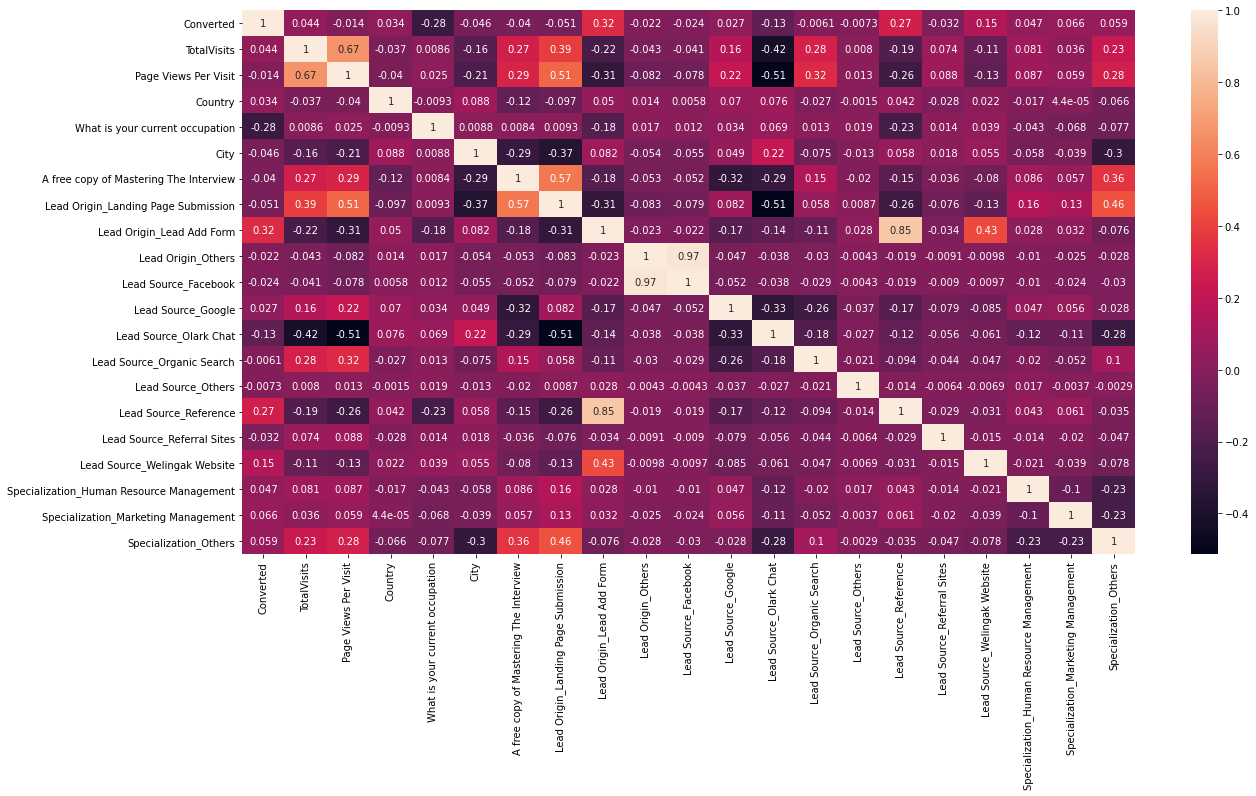

In [3952]:
#Let's see the correlation matrix

plt.figure(figsize=(20,10))
sns.heatmap(lead_data.corr(),annot=True)
plt.show()

In [3953]:
# Dropping highly correlated variables

X_test.drop(['Lead Origin_Lead Add Form','Lead Origin_Others'],1,inplace=True)
X_train.drop(['Lead Origin_Lead Add Form','Lead Origin_Others'],1,inplace=True)

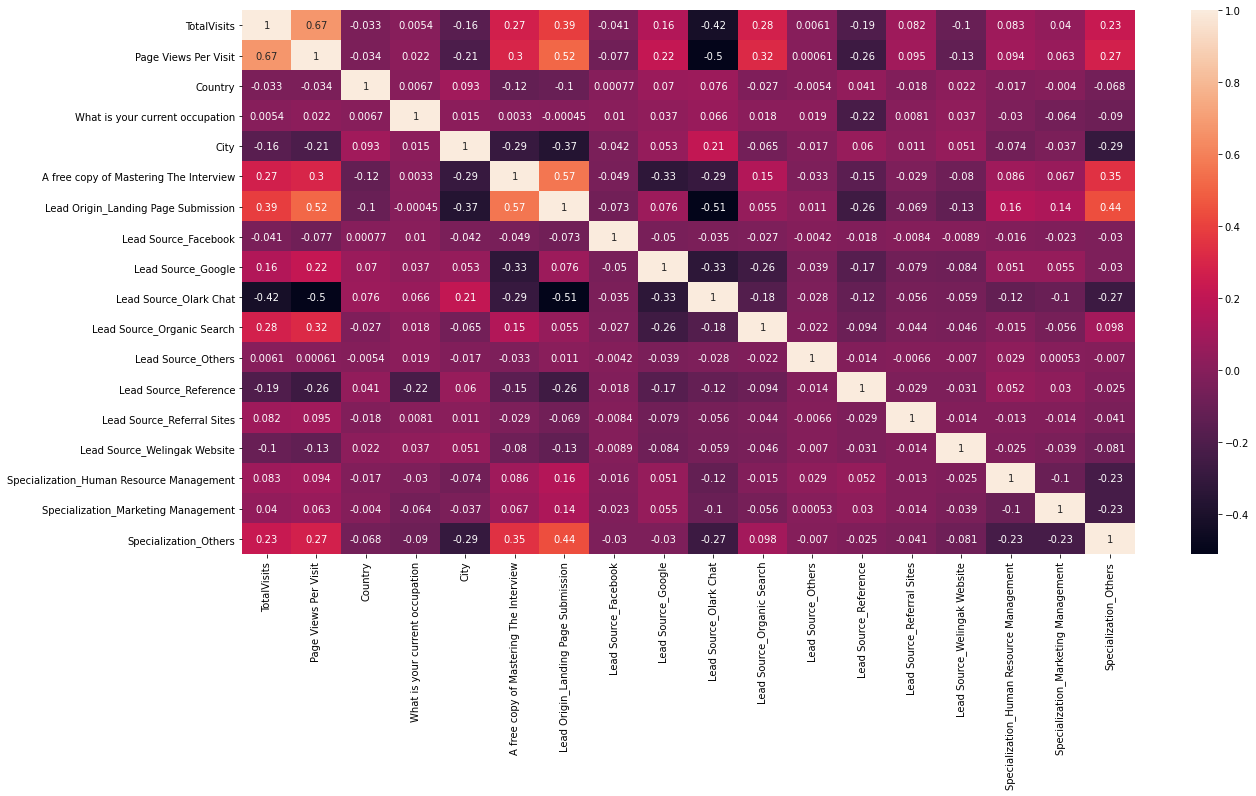

In [3954]:
# Checking the correlation matrix again

plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

### Step 7: Model Building

In [3955]:
import statsmodels.api as sm

In [3956]:
# Logistic regression model
X_train_sm=sm.add_constant(X_train)
logm1 = sm.GLM(y_train,(X_train_sm), family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3677.4
Date:                Wed, 11 Aug 2021   Deviance:                       7354.8
Time:                        21:22:02   Pearson chi2:                 6.68e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.6466      0.218      2.969      0.003       0.220       1.073
TotalVisits                                  0.2200      0.037      5.935      0.000       0.147       0.293
Page Views Per Visit                        -0.0527      0.043     -1.239      0.215      -0.136       0.031
Country                                      0.2599      0.167      1.558      0.119      -0.067       0.587
What is your current occupation             -1.8230      0.105    -17.348      0.000      -2.029      -1.617
City                                        -0.2014      0.070     -2.875      0.004      -0.339      -0.064
A free copy of Mastering The Interview       0.0968      0.087      1.115      0.265      -0.073       0.267
Lead Origin_Landing Page Submission         -0.4691      0.095     -4.956      0.000      -0.655      -0.284
Lead Source_Facebook                        -0.4933      0.448     -1.101      0.271      -1.371       0.385
Lead Source_Google                           0.4944      0.092      5.345      0.000       0.313       0.676
Lead Source_Olark Chat                      -0.0310      0.123     -0.252      0.801      -0.272       0.210
Lead Source_Organic Search                   0.1030      0.104      0.991      0.322      -0.101       0.307
Lead Source_Others                           0.4908      0.464      1.057      0.291      -0.419       1.401
Lead Source_Reference                        2.9334      0.216     13.569      0.000       2.510       3.357
Lead Source_Referral Sites                  -0.1718      0.265     -0.649      0.516      -0.691       0.347
Lead Source_Welingak Website                 5.0560      0.723      6.998      0.000       3.640       6.472
Specialization_Human Resource Management     0.4959      0.114      4.352      0.000       0.273       0.719
Specialization_Marketing Management          0.5738      0.110      5.225      0.000       0.359       0.789
Specialization_Others                        0.5547      0.082      6.731      0.000       0.393       0.716
============================================================================================================
"""

### Step 8: Feature Selection

In [3957]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [3958]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 17)             # running RFE with 17 variables as output
rfe = rfe.fit(X_train, y_train)

In [3959]:
rfe.support_

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [3960]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Country', True, 1),
 ('What is your current occupation', True, 1),
 ('City', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Others', True, 1)]

In [3961]:
col = X_train.columns[rfe.support_]

In [3962]:
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit'], dtype='object')

In [3963]:
# Logistic regression model
X_train_sm=sm.add_constant(X_train[col])
logm = sm.GLM(y_train,(X_train_sm), family = sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3678.2
Date:                Wed, 11 Aug 2021   Deviance:                       7356.3
Time:                        21:22:03   Pearson chi2:                 6.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.6671      0.217      3.071      0.002       0.241       1.093
TotalVisits                                  0.1985      0.033      6.087      0.000       0.135       0.262
Country                                      0.2530      0.167      1.517      0.129      -0.074       0.580
What is your current occupation             -1.8236      0.105    -17.354      0.000      -2.030      -1.618
City                                        -0.2002      0.070     -2.859      0.004      -0.338      -0.063
A free copy of Mastering The Interview       0.0983      0.087      1.133      0.257      -0.072       0.268
Lead Origin_Landing Page Submission         -0.4899      0.093     -5.259      0.000      -0.672      -0.307
Lead Source_Facebook                        -0.4626      0.448     -1.033      0.301      -1.340       0.415
Lead Source_Google                           0.4831      0.092      5.252      0.000       0.303       0.663
Lead Source_Olark Chat                      -0.0087      0.122     -0.071      0.943      -0.247       0.230
Lead Source_Organic Search                   0.0749      0.101      0.739      0.460      -0.124       0.274
Lead Source_Others                           0.4947      0.464      1.066      0.286      -0.415       1.404
Lead Source_Reference                        2.9599      0.215     13.761      0.000       2.538       3.382
Lead Source_Referral Sites                  -0.2094      0.264     -0.795      0.427      -0.726       0.307
Lead Source_Welingak Website                 5.0808      0.722      7.035      0.000       3.665       6.496
Specialization_Human Resource Management     0.4913      0.114      4.315      0.000       0.268       0.715
Specialization_Marketing Management          0.5691      0.110      5.187      0.000       0.354       0.784
Specialization_Others                        0.5493      0.082      6.678      0.000       0.388       0.711
============================================================================================================
"""

In [3964]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Country,16.72
2,What is your current occupation,8.70
5,Lead Origin_Landing Page Submission,5.67
3,City,4.46
7,Lead Source_Google,3.34
8,Lead Source_Olark Chat,3.24
4,A free copy of Mastering The Interview,3.01
16,Specialization_Others,2.80
11,Lead Source_Reference,1.76
9,Lead Source_Organic Search,1.63


In [3965]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
649186    0.295130
599500    0.346801
618449    0.344918
629464    0.358602
653091    0.319251
622295    0.491611
597573    0.264153
579869    0.248369
614723    0.509926
599458    0.212969
dtype: float64

In [3966]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29513039, 0.34680134, 0.34491801, 0.35860234, 0.31925088,
       0.49161101, 0.26415252, 0.24836911, 0.50992572, 0.21296928])

In [3967]:
##### Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final=y_train_pred_final[['Lead Number','Converted','Converted_Prob']]
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,649186,1,0.295130
1,599500,1,0.346801
2,618449,0,0.344918
3,629464,0,0.358602
4,653091,0,0.319251


In [3968]:
##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted
0,649186,1,0.295130,0
1,599500,1,0.346801,0
2,618449,0,0.344918,0
3,629464,0,0.358602,0
4,653091,0,0.319251,0


In [3969]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3728  230]
 [1609  895]]


In [3970]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7154131847725163


In [3971]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3678.2
Date:                Wed, 11 Aug 2021   Deviance:                       7356.3
Time:                        21:22:03   Pearson chi2:                 6.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.6671      0.217      3.071      0.002       0.241       1.093
TotalVisits                                  0.1985      0.033      6.087      0.000       0.135       0.262
Country                                      0.2530      0.167      1.517      0.129      -0.074       0.580
What is your current occupation             -1.8236      0.105    -17.354      0.000      -2.030      -1.618
City                                        -0.2002      0.070     -2.859      0.004      -0.338      -0.063
A free copy of Mastering The Interview       0.0983      0.087      1.133      0.257      -0.072       0.268
Lead Origin_Landing Page Submission         -0.4899      0.093     -5.259      0.000      -0.672      -0.307
Lead Source_Facebook                        -0.4626      0.448     -1.033      0.301      -1.340       0.415
Lead Source_Google                           0.4831      0.092      5.252      0.000       0.303       0.663
Lead Source_Olark Chat                      -0.0087      0.122     -0.071      0.943      -0.247       0.230
Lead Source_Organic Search                   0.0749      0.101      0.739      0.460      -0.124       0.274
Lead Source_Others                           0.4947      0.464      1.066      0.286      -0.415       1.404
Lead Source_Reference                        2.9599      0.215     13.761      0.000       2.538       3.382
Lead Source_Referral Sites                  -0.2094      0.264     -0.795      0.427      -0.726       0.307
Lead Source_Welingak Website                 5.0808      0.722      7.035      0.000       3.665       6.496
Specialization_Human Resource Management     0.4913      0.114      4.315      0.000       0.268       0.715
Specialization_Marketing Management          0.5691      0.110      5.187      0.000       0.354       0.784
Specialization_Others                        0.5493      0.082      6.678      0.000       0.388       0.711
============================================================================================================
"""

In [3972]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3973]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Country,16.72
2,What is your current occupation,8.70
5,Lead Origin_Landing Page Submission,5.67
3,City,4.46
7,Lead Source_Google,3.34
8,Lead Source_Olark Chat,3.24
4,A free copy of Mastering The Interview,3.01
16,Specialization_Others,2.80
11,Lead Source_Reference,1.76
9,Lead Source_Organic Search,1.63


In [3974]:
# Dropping the high p-value column 'Lead Source_Olark Chat'

col=col.drop('Lead Source_Olark Chat',1)

In [3975]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3678.2
Date:                Wed, 11 Aug 2021   Deviance:                       7356.3
Time:                        21:22:04   Pearson chi2:                 6.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.6624      0.207      3.200      0.001       0.257       1.068
TotalVisits                                  0.1989      0.032      6.182      0.000       0.136       0.262
Country                                      0.2522      0.166      1.516      0.130      -0.074       0.578
What is your current occupation             -1.8238      0.105    -17.359      0.000      -2.030      -1.618
City                                        -0.2003      0.070     -2.860      0.004      -0.338      -0.063
A free copy of Mastering The Interview       0.1001      0.083      1.205      0.228      -0.063       0.263
Lead Origin_Landing Page Submission         -0.4872      0.085     -5.725      0.000      -0.654      -0.320
Lead Source_Facebook                        -0.4569      0.440     -1.038      0.299      -1.320       0.406
Lead Source_Google                           0.4871      0.073      6.632      0.000       0.343       0.631
Lead Source_Organic Search                   0.0778      0.093      0.836      0.403      -0.105       0.260
Lead Source_Others                           0.4987      0.461      1.083      0.279      -0.404       1.401
Lead Source_Reference                        2.9659      0.198     14.993      0.000       2.578       3.354
Lead Source_Referral Sites                  -0.2050      0.256     -0.800      0.424      -0.708       0.298
Lead Source_Welingak Website                 5.0868      0.717      7.093      0.000       3.681       6.493
Specialization_Human Resource Management     0.4910      0.114      4.315      0.000       0.268       0.714
Specialization_Marketing Management          0.5690      0.110      5.187      0.000       0.354       0.784
Specialization_Others                        0.5492      0.082      6.678      0.000       0.388       0.710
============================================================================================================
"""

In [3976]:
#Lets check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Country,13.27
2,What is your current occupation,8.43
5,Lead Origin_Landing Page Submission,4.85
3,City,4.40
4,A free copy of Mastering The Interview,2.84
15,Specialization_Others,2.78
7,Lead Source_Google,2.27
13,Specialization_Human Resource Management,1.45
8,Lead Source_Organic Search,1.41
14,Specialization_Marketing Management,1.41


In [3977]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7154131847725163


In [3978]:
# dropping the 'Lead Source_Referral Sites' because of high p-value

col=col.drop('Lead Source_Referral Sites',1)

In [3979]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3678.5
Date:                Wed, 11 Aug 2021   Deviance:                       7357.0
Time:                        21:22:04   Pearson chi2:                 6.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.6481      0.206      3.141      0.002       0.244       1.053
TotalVisits                                  0.1948      0.032      6.139      0.000       0.133       0.257
Country                                      0.2544      0.166      1.528      0.126      -0.072       0.581
What is your current occupation             -1.8237      0.105    -17.358      0.000      -2.030      -1.618
City                                        -0.1994      0.070     -2.847      0.004      -0.337      -0.062
A free copy of Mastering The Interview       0.1041      0.083      1.255      0.210      -0.058       0.267
Lead Origin_Landing Page Submission         -0.4827      0.085     -5.685      0.000      -0.649      -0.316
Lead Source_Facebook                        -0.4478      0.440     -1.017      0.309      -1.311       0.415
Lead Source_Google                           0.4960      0.073      6.830      0.000       0.354       0.638
Lead Source_Organic Search                   0.0872      0.092      0.944      0.345      -0.094       0.268
Lead Source_Others                           0.5073      0.460      1.102      0.270      -0.395       1.410
Lead Source_Reference                        2.9737      0.198     15.049      0.000       2.586       3.361
Lead Source_Welingak Website                 5.0944      0.717      7.104      0.000       3.689       6.500
Specialization_Human Resource Management     0.4912      0.114      4.317      0.000       0.268       0.714
Specialization_Marketing Management          0.5696      0.110      5.191      0.000       0.355       0.785
Specialization_Others                        0.5502      0.082      6.692      0.000       0.389       0.711
============================================================================================================
"""

In [3980]:
#Lets check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Country,13.19
2,What is your current occupation,8.42
5,Lead Origin_Landing Page Submission,4.83
3,City,4.40
4,A free copy of Mastering The Interview,2.83
14,Specialization_Others,2.78
7,Lead Source_Google,2.22
12,Specialization_Human Resource Management,1.45
13,Specialization_Marketing Management,1.41
8,Lead Source_Organic Search,1.39


In [3981]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7152584339213865


In [3982]:
# Let's drop the 'Lead Source_Organic Search' bc of high p-value and again check all the statistics
col=col.drop('Lead Source_Organic Search',1)

In [3983]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3678.9
Date:                Wed, 11 Aug 2021   Deviance:                       7357.9
Time:                        21:22:04   Pearson chi2:                 6.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.6681      0.205      3.255      0.001       0.266       1.070
TotalVisits                                  0.2038      0.030      6.735      0.000       0.145       0.263
Country                                      0.2558      0.166      1.537      0.124      -0.070       0.582
What is your current occupation             -1.8219      0.105    -17.349      0.000      -2.028      -1.616
City                                        -0.2007      0.070     -2.867      0.004      -0.338      -0.063
A free copy of Mastering The Interview       0.1010      0.083      1.219      0.223      -0.061       0.263
Lead Origin_Landing Page Submission         -0.4875      0.085     -5.752      0.000      -0.654      -0.321
Lead Source_Facebook                        -0.4655      0.440     -1.059      0.290      -1.327       0.396
Lead Source_Google                           0.4741      0.069      6.895      0.000       0.339       0.609
Lead Source_Others                           0.4865      0.460      1.057      0.290      -0.415       1.388
Lead Source_Reference                        2.9584      0.197     15.024      0.000       2.572       3.344
Lead Source_Welingak Website                 5.0804      0.717      7.086      0.000       3.675       6.486
Specialization_Human Resource Management     0.4918      0.114      4.322      0.000       0.269       0.715
Specialization_Marketing Management          0.5671      0.110      5.170      0.000       0.352       0.782
Specialization_Others                        0.5533      0.082      6.736      0.000       0.392       0.714
============================================================================================================
"""

In [3984]:
#Lets check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Country,12.91
2,What is your current occupation,8.38
5,Lead Origin_Landing Page Submission,4.82
3,City,4.40
4,A free copy of Mastering The Interview,2.83
13,Specialization_Others,2.77
7,Lead Source_Google,2.02
11,Specialization_Human Resource Management,1.45
12,Specialization_Marketing Management,1.41
9,Lead Source_Reference,1.30


In [3985]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7151036830702568


In [3986]:
#lets drop the 'Lead Source_Facebook' because of high vif
col=col.drop('Lead Source_Facebook',1)

In [3987]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3679.5
Date:                Wed, 11 Aug 2021   Deviance:                       7359.1
Time:                        21:22:05   Pearson chi2:                 6.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.6551      0.205      3.196      0.001       0.253       1.057
TotalVisits                                  0.2042      0.030      6.748      0.000       0.145       0.264
Country                                      0.2567      0.167      1.541      0.123      -0.070       0.583
What is your current occupation             -1.8219      0.105    -17.352      0.000      -2.028      -1.616
City                                        -0.1954      0.070     -2.800      0.005      -0.332      -0.059
A free copy of Mastering The Interview       0.1052      0.083      1.271      0.204      -0.057       0.267
Lead Origin_Landing Page Submission         -0.4833      0.085     -5.708      0.000      -0.649      -0.317
Lead Source_Google                           0.4789      0.069      6.976      0.000       0.344       0.613
Lead Source_Others                           0.4923      0.460      1.070      0.285      -0.409       1.394
Lead Source_Reference                        2.9660      0.197     15.071      0.000       2.580       3.352
Lead Source_Welingak Website                 5.0877      0.717      7.096      0.000       3.683       6.493
Specialization_Human Resource Management     0.4917      0.114      4.323      0.000       0.269       0.715
Specialization_Marketing Management          0.5680      0.110      5.179      0.000       0.353       0.783
Specialization_Others                        0.5536      0.082      6.742      0.000       0.393       0.715
============================================================================================================
"""

In [3988]:
#Lets check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Country,12.85
2,What is your current occupation,8.37
5,Lead Origin_Landing Page Submission,4.81
3,City,4.38
4,A free copy of Mastering The Interview,2.83
12,Specialization_Others,2.77
6,Lead Source_Google,2.02
10,Specialization_Human Resource Management,1.45
11,Specialization_Marketing Management,1.41
8,Lead Source_Reference,1.30


In [3989]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7147941813679975


In [3990]:
#Let's drop the 'Lead Source_Others' because of high p-value

col=col.drop('Lead Source_Others',1)

In [3991]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3680.1
Date:                Wed, 11 Aug 2021   Deviance:                       7360.2
Time:                        21:22:05   Pearson chi2:                 6.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.6583      0.205      3.213      0.001       0.257       1.060
TotalVisits                                  0.2046      0.030      6.761      0.000       0.145       0.264
Country                                      0.2561      0.167      1.538      0.124      -0.070       0.582
What is your current occupation             -1.8195      0.105    -17.335      0.000      -2.025      -1.614
City                                        -0.1964      0.070     -2.814      0.005      -0.333      -0.060
A free copy of Mastering The Interview       0.0982      0.083      1.190      0.234      -0.064       0.260
Lead Origin_Landing Page Submission         -0.4810      0.085     -5.683      0.000      -0.647      -0.315
Lead Source_Google                           0.4731      0.068      6.915      0.000       0.339       0.607
Lead Source_Reference                        2.9618      0.197     15.053      0.000       2.576       3.347
Lead Source_Welingak Website                 5.0839      0.717      7.091      0.000       3.679       6.489
Specialization_Human Resource Management     0.4962      0.114      4.365      0.000       0.273       0.719
Specialization_Marketing Management          0.5695      0.110      5.193      0.000       0.355       0.784
Specialization_Others                        0.5545      0.082      6.751      0.000       0.393       0.715
============================================================================================================
"""

In [3992]:
#Lets check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Country,12.85
2,What is your current occupation,8.36
5,Lead Origin_Landing Page Submission,4.80
3,City,4.38
4,A free copy of Mastering The Interview,2.81
11,Specialization_Others,2.77
6,Lead Source_Google,2.00
9,Specialization_Human Resource Management,1.44
10,Specialization_Marketing Management,1.41
7,Lead Source_Reference,1.30


In [3993]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7146394305168678


In [3994]:
#Let's drop the 'A free copy of Mastering The Interview' because of high p-value
col=col.drop('A free copy of Mastering The Interview',1)

In [3995]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3680.8
Date:                Wed, 11 Aug 2021   Deviance:                       7361.6
Time:                        21:22:06   Pearson chi2:                 6.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.6853      0.204      3.366      0.001       0.286       1.084
TotalVisits                                  0.2092      0.030      6.968      0.000       0.150       0.268
Country                                      0.2477      0.166      1.490      0.136      -0.078       0.574
What is your current occupation             -1.8166      0.105    -17.313      0.000      -2.022      -1.611
City                                        -0.2002      0.070     -2.871      0.004      -0.337      -0.064
Lead Origin_Landing Page Submission         -0.4441      0.079     -5.644      0.000      -0.598      -0.290
Lead Source_Google                           0.4343      0.060      7.225      0.000       0.316       0.552
Lead Source_Reference                        2.9454      0.196     15.009      0.000       2.561       3.330
Lead Source_Welingak Website                 5.0701      0.717      7.073      0.000       3.665       6.475
Specialization_Human Resource Management     0.5065      0.113      4.466      0.000       0.284       0.729
Specialization_Marketing Management          0.5801      0.109      5.307      0.000       0.366       0.794
Specialization_Others                        0.5682      0.081      6.984      0.000       0.409       0.728
============================================================================================================
"""

In [3996]:
#Lets check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Country,12.79
2,What is your current occupation,8.31
3,City,4.38
4,Lead Origin_Landing Page Submission,3.95
10,Specialization_Others,2.71
5,Lead Source_Google,1.58
8,Specialization_Human Resource Management,1.43
9,Specialization_Marketing Management,1.40
6,Lead Source_Reference,1.29
0,TotalVisits,1.22


In [3997]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7154131847725163


In [3998]:
# Let's drop the 'Country' because of high p-value
col=col.drop('Country',1)

In [3999]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6462
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3681.9
Date:                Wed, 11 Aug 2021   Deviance:                       7363.9
Time:                        21:22:06   Pearson chi2:                 6.67e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.9204      0.129      7.131      0.000       0.667       1.173
TotalVisits                                  0.2093      0.030      6.975      0.000       0.150       0.268
What is your current occupation             -1.8148      0.105    -17.302      0.000      -2.020      -1.609
City                                        -0.1947      0.070     -2.797      0.005      -0.331      -0.058
Lead Origin_Landing Page Submission         -0.4486      0.079     -5.707      0.000      -0.603      -0.295
Lead Source_Google                           0.4414      0.060      7.366      0.000       0.324       0.559
Lead Source_Reference                        2.9522      0.196     15.047      0.000       2.568       3.337
Lead Source_Welingak Website                 5.0758      0.717      7.081      0.000       3.671       6.481
Specialization_Human Resource Management     0.5041      0.113      4.448      0.000       0.282       0.726
Specialization_Marketing Management          0.5792      0.109      5.300      0.000       0.365       0.793
Specialization_Others                        0.5660      0.081      6.960      0.000       0.407       0.725
============================================================================================================
"""

In [4000]:
#Lets check the VIFs again

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,What is your current occupation,4.78
3,Lead Origin_Landing Page Submission,3.83
2,City,3.40
9,Specialization_Others,2.59
4,Lead Source_Google,1.54
7,Specialization_Human Resource Management,1.41
8,Specialization_Marketing Management,1.37
5,Lead Source_Reference,1.23
0,TotalVisits,1.22
6,Lead Source_Welingak Website,1.05


In [4001]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7154131847725163


### Step 9: Finding Optimal Cut off Point

In [4002]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,649186,1,0.310826,0,1,1,1,1,0,0,0,0,0,0
1,599500,1,0.323611,0,1,1,1,1,0,0,0,0,0,0
2,618449,0,0.352853,0,1,1,1,1,0,0,0,0,0,0
3,629464,0,0.365300,0,1,1,1,1,0,0,0,0,0,0
4,653091,0,0.311801,0,1,1,1,1,0,0,0,0,0,0


In [4003]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.387496  1.000000  0.000000
0.1   0.1  0.387496  1.000000  0.000000
0.2   0.2  0.407304  0.980032  0.044972
0.3   0.3  0.612194  0.734824  0.534613
0.4   0.4  0.702878  0.462061  0.855230
0.5   0.5  0.715413  0.356629  0.942395
0.6   0.6  0.714639  0.327875  0.959323
0.7   0.7  0.713092  0.297125  0.976251
0.8   0.8  0.689879  0.220048  0.987115
0.9   0.9  0.658774  0.125399  0.996210


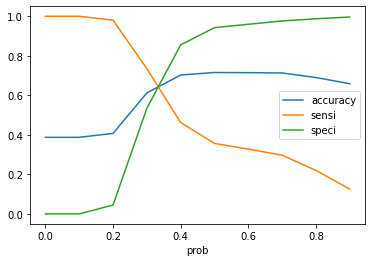

In [4004]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point butwe will tak 0.27 to recall all the true values to take it as a cutoff probability.

In [4005]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.272 else 0)

y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,649186,1,0.310826,0,1,1,1,1,0,0,0,0,0,0,1
1,599500,1,0.323611,0,1,1,1,1,0,0,0,0,0,0,1
2,618449,0,0.352853,0,1,1,1,1,0,0,0,0,0,0,1
3,629464,0,0.365300,0,1,1,1,1,0,0,0,0,0,0,1
4,653091,0,0.311801,0,1,1,1,1,0,0,0,0,0,0,1


In [4006]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.5701021355617456

In [4007]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[1674, 2284],
       [ 494, 2010]])

In [4008]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692  

In [4009]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [4010]:
# Let us calculate specificity
TN / float(TN+FP)

0.4229408792319353

In [4011]:
# Negative predictive value
print (TN / float(TN+ FN))

0.772140221402214


In [4012]:
#Precision

Precision=TP/float(TP+FP)
Precision

0.4680950163018165

In [4013]:
#Recall

Recall=TP/float(TP+FN)
Recall

0.8027156549520766

In [4014]:
#F1- score

F1=2*(Recall * Precision) / (Recall + Precision)
F1

0.5913503971756399

#### Precision and recall tradeoff

In [4015]:
from sklearn.metrics import precision_recall_curve

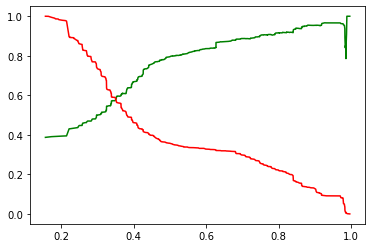

In [4016]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 10: Plotting the ROC Curve

An ROC curve demonstrates several things:
It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [4017]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [4018]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

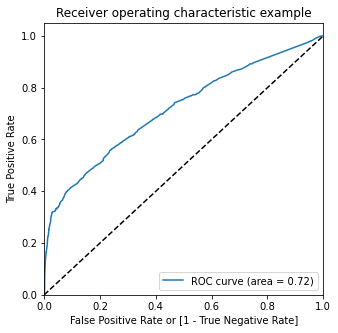

In [4019]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [4020]:
X_test.columns

Index(['TotalVisits', 'Page Views Per Visit', 'Country',
       'What is your current occupation', 'City',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management', 'Specialization_Others'],
      dtype='object')

### Step 11: Making predication on the test data

In [4021]:
X_test[['TotalVisits','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Page Views Per Visit']])

In [4022]:
X_test = X_test[col]
X_test.head()

,TotalVisits,What is your current occupation,City,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Reference,Lead Source_Welingak Website,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Others
Lead Number,,,,,,,,,,
613343,-0.395598,0,1,1,0,0,0,1,0,0
583526,0.482472,1,0,1,0,0,0,0,0,0
601484,-0.980978,1,1,0,0,0,1,0,0,0
587507,-0.980978,1,1,0,0,0,0,0,0,0
635654,-0.102908,0,0,1,0,0,0,0,0,1


In [4023]:
X_test_sm = sm.add_constant(X_test)

Making prediction on the test set

In [4024]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

Lead Number
613343    0.667838
583526    0.224090
601484    0.977717
587507    0.215109
635654    0.734255
589885    0.284615
655685    0.382876
589632    0.201744
608186    0.335865
637409    0.862324
dtype: float64

In [4025]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
Lead Number,
613343,0.667838
583526,0.224090
601484,0.977717
587507,0.215109
635654,0.734255


In [4026]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
Lead Number,
613343,1
583526,1
601484,1
587507,0
635654,1


In [4027]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [4028]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [4029]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,613343,0.667838
1,1,583526,0.224090
2,1,601484,0.977717
3,0,587507,0.215109
4,1,635654,0.734255


In [4030]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [4031]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,613343,1,0.667838
1,583526,1,0.224090
2,601484,1,0.977717
3,587507,0,0.215109
4,635654,1,0.734255


In [4032]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.272 else 0)
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,613343,1,0.667838,1
1,583526,1,0.224090,0
2,601484,1,0.977717,1
3,587507,0,0.215109,0
4,635654,1,0.734255,1


In [4033]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.5797833935018051

In [4034]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[760, 954],
       [210, 846]])

In [4035]:
#Precision

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.4680950163018165

In [4036]:
#Recall

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8027156549520766

In [4037]:
# Generating the score variable

y_pred_final["Lead Score"]=round(y_pred_final['Converted_Prob']*100,0)
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted,Lead Score
0,613343,1,0.667838,1,67.0
1,583526,1,0.224090,0,22.0
2,601484,1,0.977717,1,98.0
3,587507,0,0.215109,0,22.0
4,635654,1,0.734255,1,73.0


### Finally we predicted the Lead_score with 80% conversion rate in our model